In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from titanic_utils import is_adult

## Load Data

In [2]:
df = pd.read_csv('../data/raw/titanic.csv')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Plot Survival Rate by Class and Sex

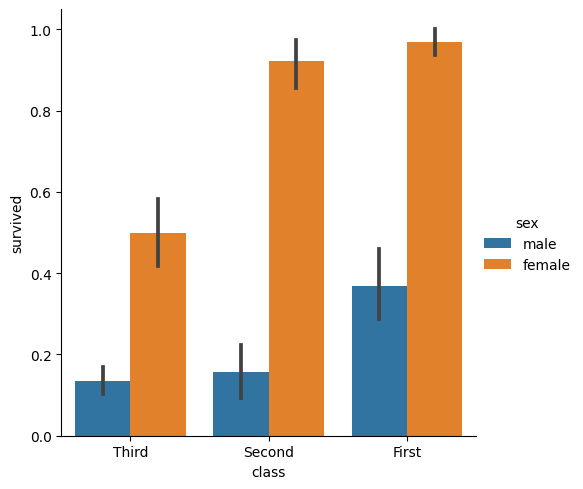

In [3]:
sns.catplot(data=df, x='class', y='survived', order=['Third', 'Second', 'First'], hue='sex', kind='bar');
filename = Path('../results/survival_rate.jpg')
filename.parent.mkdir(parents=True, exist_ok=True)
plt.savefig(filename);

## Factor in Age

In [4]:
df['isAdult'] = is_adult(df.age)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,isAdult
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,True
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,True
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,True


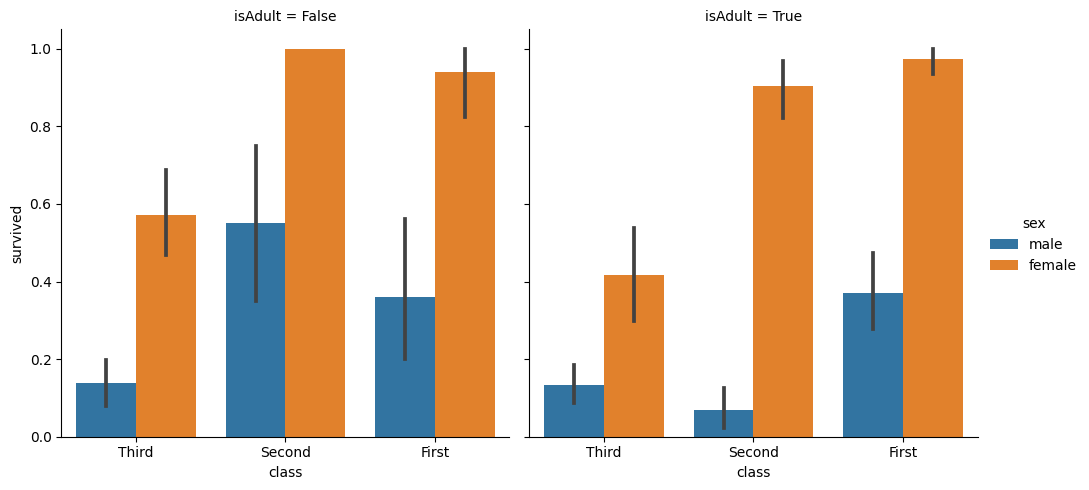

In [5]:
sns.catplot(data=df, x='class', y='survived', order=['Third', 'Second', 'First'], hue='sex', col='isAdult', kind='bar');
filename = Path('../results/survival_rate_adults.jpg')
filename.parent.mkdir(parents=True, exist_ok=True)
plt.savefig(filename);